 # 9장 식료품 구매에 어떤 연관성이 있을까?

## **1. 데이터 수집하기**

식료품 데이터 셋 수집하기:
https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset?select=Groceries_dataset.csv

In [ ]:
# 1.1 파일 업로드하기
from google.colab import files
uploaded = files.upload()

Saving Groceries_dataset.csv to Groceries_dataset.csv


In [ ]:
# 2.2 데이터프레임 생성하기
import pandas as pd
df = pd.read_csv('/content/Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


## **2. 탐색적 데이터 분석 및 전처리하기**

# 2.1 데이터 살펴보기

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB



 결측치 확인하기

In [ ]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

#2.2 빈도수 시각화하기

In [ ]:
df['itemDescription'].value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

<Axes: >

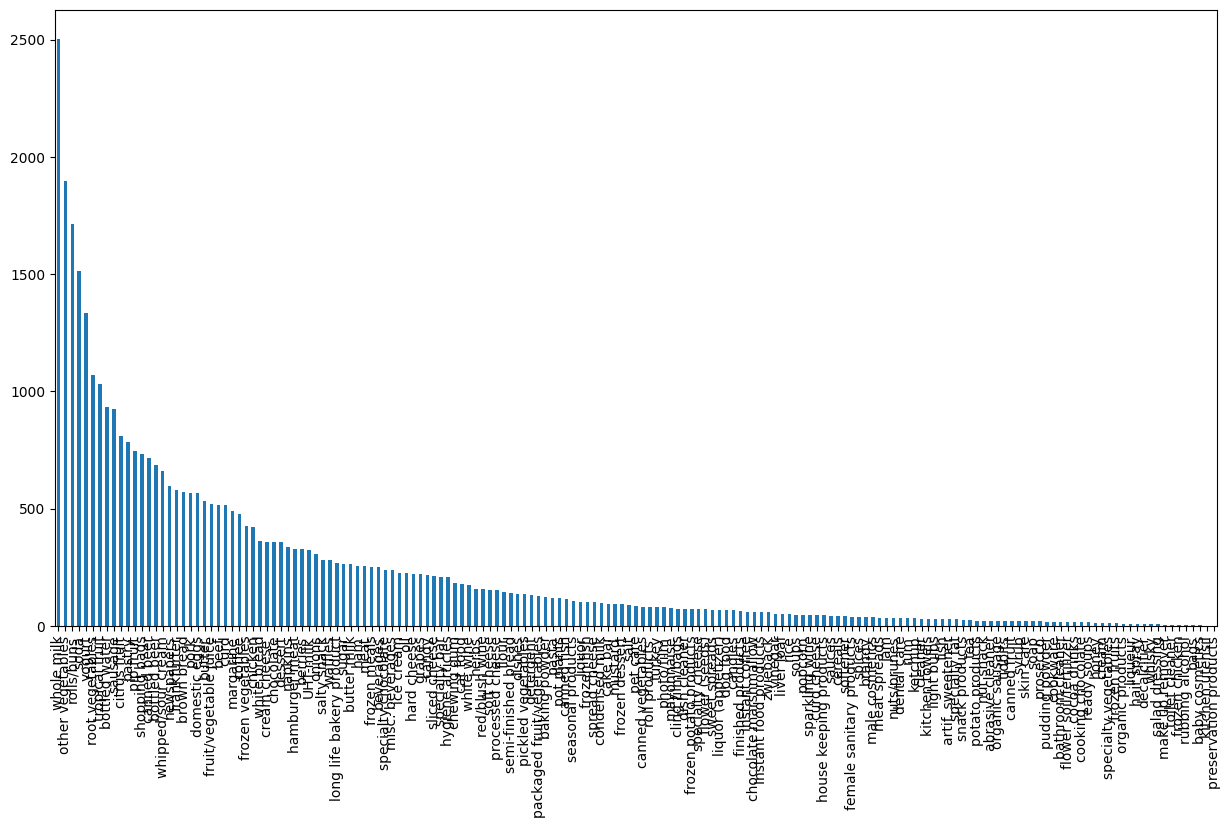

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
df['itemDescription'].value_counts().plot(kind='bar')

#2.3 연관 분석을 위한 트랜잭션 데이터 생성하기




(1) 항목 집합 확인하기

In [ ]:
products = df['itemDescription'].unique()
products

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

(2) 항목 집합을 원핫 인코딩으로 변환하기

In [ ]:
one_hot=pd.get_dummies(df['itemDescription'])
one_hot

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38760,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38761,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(3) 고객번호, 날짜와 원핫 인코딩 항목 결합하기

In [ ]:
df2 = df.drop('itemDescription', axis=1)      # 데이터 프레임에서 품목 제외하기
df2 = df2.join(one_hot)
df2.head()

,Member_number,Date,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,21-07-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2552,05-01-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2300,19-09-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1187,12-12-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3037,01-02-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


(4) 날짜별, 고객별로 그룹화하여 트랜잭션 생성하기

In [ ]:
transaction= df2.groupby(["Member_number","Date"])[products[:]].apply(sum)
transaction =transaction.reset_index('Member_number')                  #고객 번호 인덱스에서 해제하기
transaction

,Member_number,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
Date,,,,,,,,,,,,,,,,,,,,,
15-03-2015,1000,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24-06-2014,1000,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24-07-2015,1000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25-11-2015,1000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27-05-2015,1000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24-01-2015,4999,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26-12-2015,4999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
09-03-2014,5000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(5) 원핫 인코딩하여 통합한 데이터 통계정보 확인하기

In [ ]:
transaction.describe()

,Member_number,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
count,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,...,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000
mean,3006.840807,0.068970,0.167212,0.049723,0.126846,0.114683,0.007886,0.054267,0.034485,0.038762,...,0.004678,0.003275,0.001804,0.000401,0.000735,0.001136,0.001002,0.000334,0.000334,0.000067
std,1152.947471,0.258374,0.398805,0.220432,0.347547,0.333810,0.089208,0.231513,0.185385,0.198160,...,0.069212,0.057134,0.042442,0.020021,0.027105,0.033689,0.031647,0.018278,0.018278,0.008175
min,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5000.000000,3.000000,4.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(6) 연관 분석을 위해 1보다 큰 데이터 처리하기

In [ ]:
transaction2=transaction.iloc[:,1:]   # 품목 데이터만 추출하여 transaction2에 저장하기
transaction2[transaction2>=1]=1       # 속성값이 1 이상인 것을 1로 대체
transaction2

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
Date,,,,,,,,,,,,,,,,,,,,,
15-03-2015,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24-06-2014,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24-07-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25-11-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27-05-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24-01-2015,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26-12-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
09-03-2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
transaction2.describe()

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
count,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,...,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000
mean,0.067767,0.157923,0.049054,0.122101,0.110005,0.007819,0.053131,0.033950,0.037760,0.027869,...,0.004611,0.003275,0.001804,0.000401,0.000735,0.001136,0.001002,0.000334,0.000334,0.000067
std,0.251354,0.364681,0.215989,0.327414,0.312906,0.088083,0.224302,0.181108,0.190621,0.164602,...,0.067753,0.057134,0.042442,0.020021,0.027105,0.033689,0.031647,0.018278,0.018278,0.008175
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
transaction2.to_csv('groceries_transaction.csv')   # 트랜잭션 데이터 파일로 저장하기

#3. 연관 분석하기



In [ ]:
# 연관분석을 위한 라이브러리 추가하기
from mlxtend.frequent_patterns import fpgrowth, association_rules

3.1 빈발 항목 집합 구하기

In [ ]:
frequent_itemsets=fpgrowth(transaction2, min_support=0.01, max_len=3, use_colnames=True)
frequent_itemsets.sort_values(by=['support'], ascending=True).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
52,0.010025,(soft cheese)
47,0.010158,(processed cheese)
26,0.010493,(red/blush wine)
67,0.010559,"(rolls/buns, other vegetables)"
37,0.010559,(herbs)
64,0.011161,"(yogurt, whole milk)"
65,0.011629,"(whole milk, soda)"
35,0.011696,(white wine)
62,0.011829,(cat food)
63,0.012030,(chewing gum)


In [ ]:
frequent_itemsets.sort_values(by=['support'], ascending=True).tail(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
43,0.053131,(citrus fruit)
2,0.060349,(sausage)
29,0.060683,(bottled water)
18,0.067767,(tropical fruit)
22,0.069572,(root vegetables)
1,0.085879,(yogurt)
8,0.097106,(soda)
11,0.110005,(rolls/buns)
15,0.122101,(other vegetables)
0,0.157923,(whole milk)


In [ ]:
frequent_itemsets.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(69, 2)

In [ ]:
frequent_itemsets=fpgrowth(transaction2, min_support=0.001, max_len=3, use_colnames=True)
frequent_itemsets.sort_values(by=['support'], ascending=True).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
374,0.001002,"(rolls/buns, detergent)"
356,0.001002,"(butter milk, tropical fruit)"
353,0.001002,"(butter milk, root vegetables)"
348,0.001002,"(sugar, tropical fruit)"
338,0.001002,"(butter, canned beer)"
337,0.001002,"(butter, brown bread)"
291,0.001002,"(white bread, whipped/sour cream)"
286,0.001002,"(white bread, brown bread)"
284,0.001002,"(white bread, tropical fruit)"
360,0.001002,"(butter milk, shopping bags)"


In [ ]:
frequent_itemsets.sort_values(by=['support'], ascending=True).tail(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
64,0.053131,(citrus fruit)
2,0.060349,(sausage)
37,0.060683,(bottled water)
20,0.067767,(tropical fruit)
24,0.069572,(root vegetables)
1,0.085879,(yogurt)
9,0.097106,(soda)
13,0.110005,(rolls/buns)
17,0.122101,(other vegetables)
0,0.157923,(whole milk)


In [ ]:
frequent_itemsets.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(750, 2)

3.2 연관 규칙 찾기

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.001)
rules.sort_values(by=['lift'], ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
41,(sausage),"(yogurt, whole milk)",0.060349,0.011161,0.001470,0.024363,2.182917,0.000797,1.013532,0.576701
36,"(yogurt, whole milk)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,0.000797,1.082219,0.548014
38,"(whole milk, sausage)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681,0.481231
39,(yogurt),"(whole milk, sausage)",0.085879,0.008955,0.001470,0.017121,1.911760,0.000701,1.008307,0.521727
464,(citrus fruit),(specialty chocolate),0.053131,0.015973,0.001403,0.026415,1.653762,0.000555,1.010726,0.417500
...,...,...,...,...,...,...,...,...,...,...
288,(beef),(tropical fruit),0.033950,0.067767,0.001136,0.033465,0.493817,-0.001165,0.964510,-0.514814
282,(rolls/buns),(beef),0.110005,0.033950,0.001604,0.014581,0.429474,-0.002131,0.980344,-0.598817
283,(beef),(rolls/buns),0.033950,0.110005,0.001604,0.047244,0.429474,-0.002131,0.934127,-0.578968
916,(citrus fruit),(sausage),0.053131,0.060349,0.001203,0.022642,0.375177,-0.002003,0.961419,-0.637531


연관규칙 간단하게 출력하기

In [ ]:
fp_rules=rules.loc[:, ['antecedents','consequents','support','confidence','lift']]
fp_rules.sort_values(by=['lift'], ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
41,(sausage),"(yogurt, whole milk)",0.001470,0.024363,2.182917
36,"(yogurt, whole milk)",(sausage),0.001470,0.131737,2.182917
38,"(whole milk, sausage)",(yogurt),0.001470,0.164179,1.911760
39,(yogurt),"(whole milk, sausage)",0.001470,0.017121,1.911760
464,(citrus fruit),(specialty chocolate),0.001403,0.026415,1.653762
...,...,...,...,...,...
288,(beef),(tropical fruit),0.001136,0.033465,0.493817
282,(rolls/buns),(beef),0.001604,0.014581,0.429474
283,(beef),(rolls/buns),0.001604,0.047244,0.429474
916,(citrus fruit),(sausage),0.001203,0.022642,0.375177


3.3 연관규칙 시각화하기

지지도와 신뢰도의 분포 시각화하기

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='support', ylabel='confidence'>

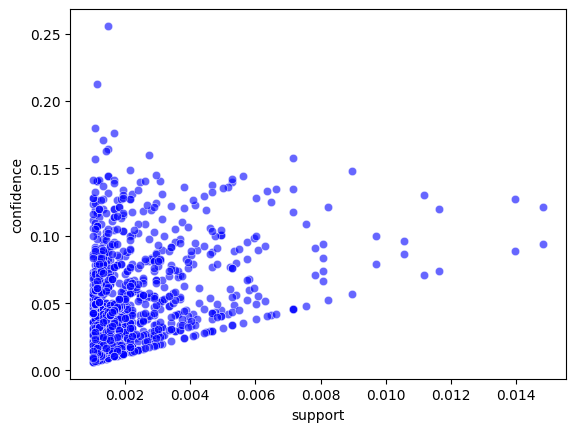

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=fp_rules, x='support', y='confidence', color='blue', alpha=0.6)

지지도와 향상도의 분포 시각화하기

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


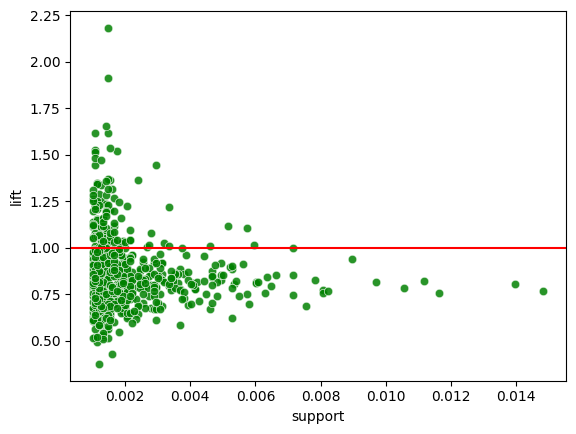

In [ ]:
sns.scatterplot(data=fp_rules, x='support', y='lift', color='green', alpha=0.6)
plt.axhline(y=1, color='red')
plt.show()

 신뢰도와 향상도의 분포 시각화하기

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='confidence', ylabel='lift'>

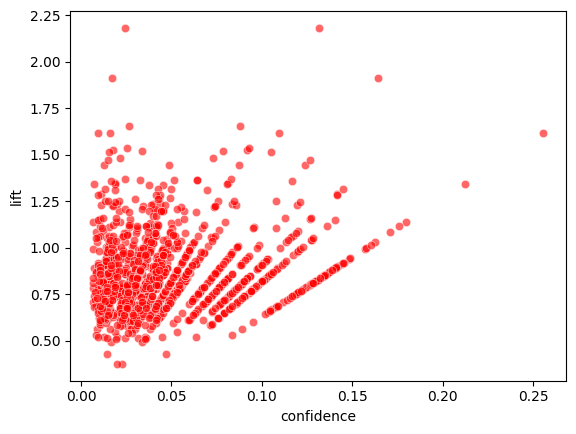

In [ ]:
sns.scatterplot(data=fp_rules, x='confidence', y='lift', color='red', alpha=0.6)

향상도가 1초과하는 연관 규칙 출력하기

In [ ]:
fp_rules[(fp_rules['lift']) >1 ].sort_values(by=['confidence'], ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
37,"(yogurt, sausage)",(whole milk),0.001470,0.255814,1.619866
44,"(rolls/buns, sausage)",(whole milk),0.001136,0.212500,1.345594
50,"(soda, sausage)",(whole milk),0.001069,0.179775,1.138374
55,(semi-finished bread),(whole milk),0.001671,0.176056,1.114825
15,"(yogurt, rolls/buns)",(whole milk),0.001337,0.170940,1.082428
...,...,...,...,...,...
484,(whole milk),(detergent),0.001403,0.008887,1.030824
18,(whole milk),"(yogurt, rolls/buns)",0.001337,0.008464,1.082428
1207,(other vegetables),(pot plants),0.001002,0.008210,1.049991
45,(whole milk),"(rolls/buns, sausage)",0.001136,0.007194,1.345594


#4. 연관 분석 활용하기

관심 상품과 함께 구매하는 상품 출력하기

In [ ]:
fp_rules[(fp_rules['antecedents']==frozenset({'rolls/buns'}))].sort_values(by = 'lift', ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
987,(rolls/buns),(processed cheese),0.001470,0.013366,1.315734
578,(rolls/buns),(packaged fruit/vegetables),0.001203,0.010936,1.288421
1236,(rolls/buns),(seasonal products),0.001002,0.009113,1.286395
550,(rolls/buns),(red/blush wine),0.001337,0.012151,1.158028
46,(rolls/buns),"(whole milk, sausage)",0.001136,0.010328,1.153275
...,...,...,...,...,...
1160,(rolls/buns),(ham),0.001270,0.011543,0.674687
1099,(rolls/buns),(beverages),0.001203,0.010936,0.659796
452,(rolls/buns),(butter milk),0.001270,0.011543,0.656730
326,(rolls/buns),(whipped/sour cream),0.002941,0.026731,0.611595
